In [2]:
%cd /home/q123/Desktop/explo

import torch 
import gpytorch 
import logging
import logging.config

from src.helpers import setup_experiment
from src.optimizers.gibo import GIBOptimizer
from src.optimizers.vanilla import BOptimizer
from src.config import get_configs

logging.config.fileConfig('logging.conf')
# create root logger
logger = logging.getLogger()

/home/q123/Desktop/explo


In [4]:
from src.tester import Tester 

env_name = "Swimmer-v4"
kernel_name = "linearstate"
kernel_name2 = "rbf"
delta = 1e-3
n_train =50
n_test = 100
n_episodes = 1 ### number of runs for test episodes / for train = 1
local_opt = "/home/q123/Desktop/explo/local_optima/Swimmer-v4_[8, 8, 2]"

In [5]:
env_config,likelihood_config,kernel_config,_,_ = get_configs(env_name,kernel_name)
additional_layers=[8]
model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,additional_layers)
tester = Tester(model,objective_env,
                 local_opt =local_opt,
                 use_opt_states = True,
                 delta =delta,
                 n_train=n_train,n_test=n_test,n_episodes=n_episodes)

#### generate data for all experiments
train_data,test_data,opt_states = tester.generate_data()

/home/q123/miniconda3/envs/explo/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment Swimmer-v4 is out of date. You should consider upgrading to version `v3` with the environment ID `Swimmer-v3`.
  logger.warn(


MathLog.src.helpers : WARNING : MLP dimensions : [8, 8, 2]
Using ard_num_dims = 90
local_y 0.15165117383003235 local_opt tensor([-0.0159, -0.3698,  0.3099,  0.1021, -0.1844,  0.0129, -0.0065,  0.2811,
         0.0296,  0.2647])
 intial local opt reward : 0.13829310834407807
Generating data
Done generating data


##############################
covar_lengthscale max 0.0004995004856027663 / min 0.0004995004856027663
variance  tensor([[0.6931]], grad_fn=<SoftplusBackward>)
noise 0.014999999664723873
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
##############################
covar_lengthscale max 0.0004995004856027663 / min 0.0004995004856027663
variance  tensor([[2.0029e-12]], grad_fn=<SoftplusBackward>)
noise 0.01000000350177288
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 

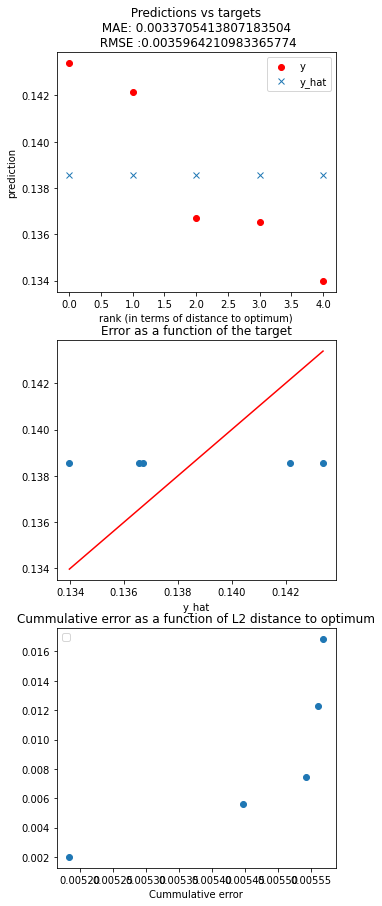

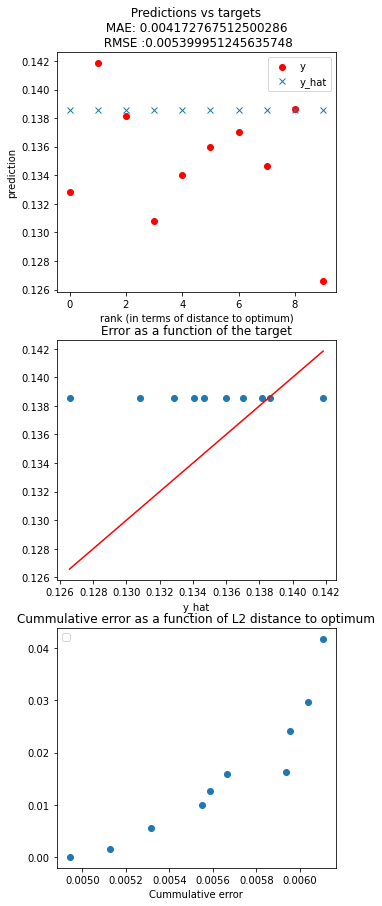

In [6]:
train_data,train_pred,test_data,test_pred,opt_data = tester.run(train_data,test_data,opt_states)

MathLog.src.helpers : WARNING : MLP dimensions : [8, 8, 2]


/home/q123/miniconda3/envs/explo/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment Swimmer-v4 is out of date. You should consider upgrading to version `v3` with the environment ID `Swimmer-v3`.
  logger.warn(


Using ard_num_dims = 90
local_y 0.15165117383003235 local_opt tensor([-0.0159, -0.3698,  0.3099,  0.1021, -0.1844,  0.0129, -0.0065,  0.2811,
         0.0296,  0.2647])
 intial local opt reward : 0.13446163088083268
##############################
covar_lengthscale max 0.5 / min 0.5                      covar_outputscale 1.9999998807907104                     noise 0.014999999664723873
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
##############################
covar_lengthscale max 0.33415427803993225 / min 0.333415687084198                      covar_outputscale 1.641808271408081                   

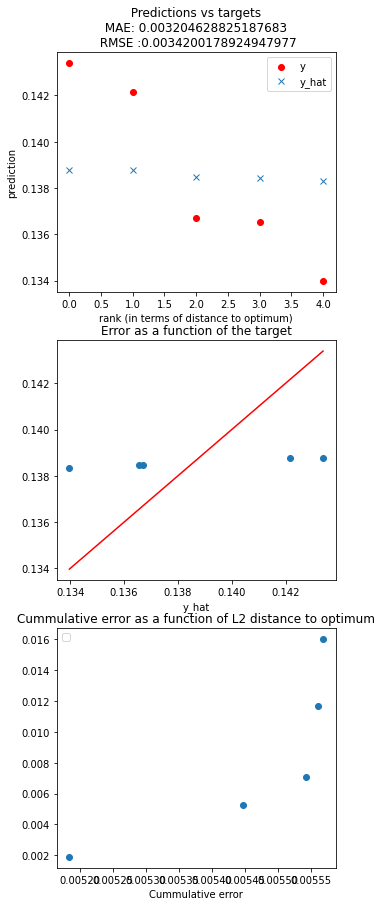

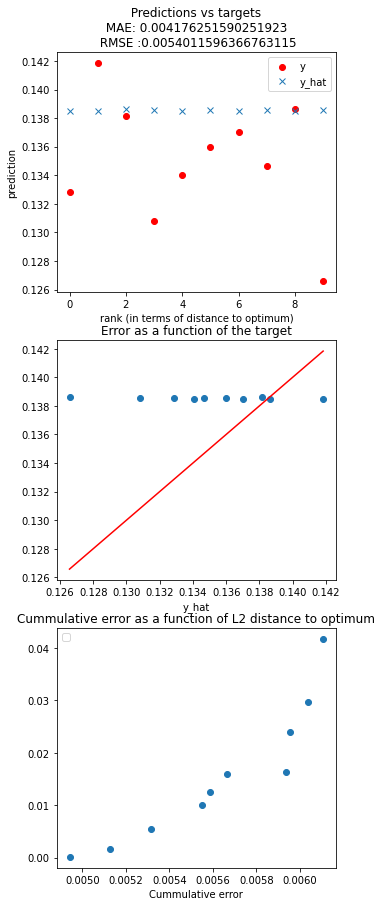

In [7]:
env_config,likelihood_config,kernel_config,_,_ = get_configs(env_name,kernel_name2)
additional_layers=[8]
model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,additional_layers)
tester = Tester(model,objective_env,
                 local_opt =local_opt,
                 use_opt_states = True,
                 delta =delta,
                 n_train=n_train,n_test=n_test,n_episodes=n_episodes)

train_data,train_pred,test_data,test_pred,opt_data = tester.run(train_data,test_data,opt_states)

In [8]:
from sklearn.linear_model import ARDRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


train_x,train_y,train_s = train_data
test_x,test_y,test_s = test_data
local_opt,opt_states = opt_data

Phi_train = tester.model.mlp(train_x,opt_states).flatten(start_dim=1)
Phi_test = tester.model.mlp(test_x,opt_states).flatten(start_dim=1)
Y_train,Y_test = train_y,test_y

ard = make_pipeline(StandardScaler(),
                    ARDRegression(compute_score=True, n_iter=20))

ard.fit(Phi_train, Y_train)

Y_train_pred = ard.predict(Phi_train)
Y_test_pred = ard.predict(Phi_test)

In [9]:
def plot(x,best_x,y,y_hat):
    
    fig,axs = plt.subplots(3,figsize=(5,12))
    
    print(x.shape,best_x.shape)
    dist = torch.linalg.norm(x-best_x,dim=1)
    idx = torch.argsort(dist)
    
    y = y[idx]
    y_hat = y_hat[idx]
    x_plot = range(len(y))
    axs[0].scatter(x_plot,y,label="y",color="red")
    axs[0].errorbar(x_plot,y_hat,label="y_hat",fmt="x")
    axs[0].title.set_text(f' Predictions vs targets \n MAE: {mae(y,y_hat)} \n RMSE :{mse(y,y_hat,squared=False)}')
    axs[0].set_xlabel("rank (in terms of distance to optimum)")
    axs[0].set_ylabel("prediction")
    
    axs[0].legend()
    
    idx2 = torch.argsort(y)
    axs[1].scatter(y[idx2],y_hat[idx2],label="error")
    axs[1].plot(y[idx2],y[idx2],color="red")
    axs[1].title.set_text("Error as a function of the target")
    axs[1].set_xlabel("y")
    axs[1].set_xlabel("y_hat")
    
    error = torch.abs(y[idx]-y_hat[idx])
    axs[2].scatter(dist[idx],torch.cumsum(error,dim=0))
    axs[2].set_title("Cummulative error as a function of L2 distance to optimum")
    axs[2].set_xlabel("||x - x_opt||")
    axs[2].set_xlabel("Cummulative error")
    
    plt.legend()
    

torch.Size([5, 90]) torch.Size([90])
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


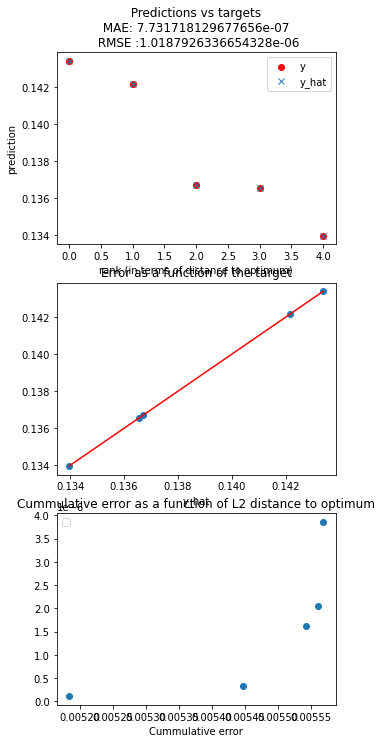

In [10]:
plot(train_x,local_opt.squeeze(),Y_train,Y_train_pred)

torch.Size([10, 90]) torch.Size([90])
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


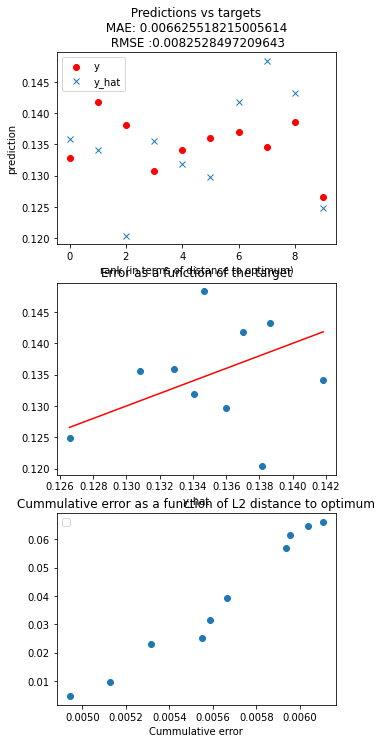

In [11]:
plot(test_x,local_opt.squeeze(),Y_test,Y_test_pred)